# DATA EXPLORATION
# FINDING TARGET CUSTOMERS AND MARKETING ANALYSIS
# FRAUD DETECTION

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Load the dataset
data = pd.read_csv('simulated_transaction_2024.csv')
data.head()

,Date,Timestamp,Account No,Balance,Amount,Third Party Account No,Third Party Name
0,01/01/2023,00:00,678330503.0,2971.0,1584.0,NaN,Westport Care Home
1,01/01/2023,00:00,472213568.0,3792.0,1950.0,NaN,Barbiee Boutique
2,01/01/2023,00:00,472213568.0,3012.0,-780.0,283027736.0,NaN
3,01/01/2023,00:00,283027736.0,1787.0,780.0,472213568.0,NaN
4,01/01/2023,00:00,624500124.0,3226.0,1825.0,NaN,Fat Face


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230596 entries, 0 to 230595
Data columns (total 7 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Date                    230367 non-null  object 
 1   Timestamp               230345 non-null  object 
 2   Account No              230372 non-null  float64
 3   Balance                 230350 non-null  float64
 4   Amount                  230387 non-null  float64
 5   Third Party Account No  6832 non-null    float64
 6   Third Party Name        223517 non-null  object 
dtypes: float64(4), object(3)
memory usage: 12.3+ MB


In [3]:
data.shape 

(230596, 7)

In [4]:
data.columns

Index(['Date', 'Timestamp', 'Account No', 'Balance', 'Amount',
       'Third Party Account No', 'Third Party Name'],
      dtype='object')

In [5]:
data.dtypes

Date                       object
Timestamp                  object
Account No                float64
Balance                   float64
Amount                    float64
Third Party Account No    float64
Third Party Name           object
dtype: object

In [6]:
data.describe()

,Account No,Balance,Amount,Third Party Account No
count,2.303720e+05,230350.000000,230387.000000,6.832000e+03
mean,5.505993e+08,3609.351057,6.437717,5.370263e+08
std,2.560610e+08,5379.331174,508.200101,2.596927e+08
min,1.015313e+08,-5790.983500,-12240.000000,1.019085e+08
25%,3.314502e+08,373.453932,-74.000000,3.114679e+08
50%,5.501698e+08,1686.009850,-28.700000,5.381491e+08
75%,7.682718e+08,5215.031852,-12.060000,7.485097e+08
max,9.997527e+08,46804.158837,12240.000000,9.997527e+08


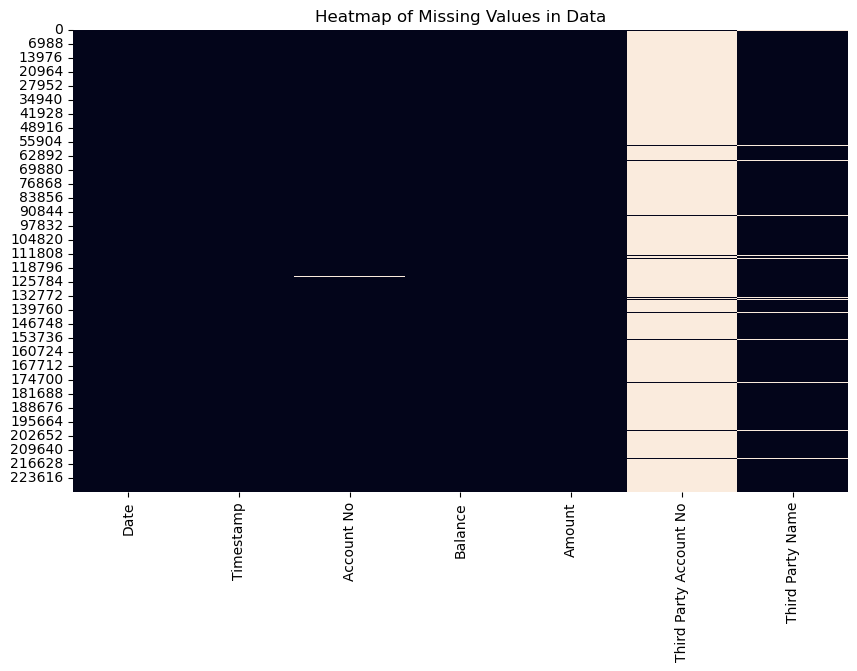

In [7]:
# Visualize missing values as a heatmap
plt.figure(figsize=(10,6))
sns.heatmap(data.isnull(), cbar=False)
plt.title('Heatmap of Missing Values in Data')
plt.show()

### This map is not giving clear missing values, as we have a large dataset, lets proceed normally

In [8]:
data.isnull().sum()

Date                         229
Timestamp                    251
Account No                   224
Balance                      246
Amount                       209
Third Party Account No    223764
Third Party Name            7079
dtype: int64

In [9]:
# Calculate the percentage of null values for each column
data.isnull().mean() * 100

Date                       0.099308
Timestamp                  0.108848
Account No                 0.097140
Balance                    0.106680
Amount                     0.090635
Third Party Account No    97.037243
Third Party Name           3.069871
dtype: float64

### i want to to check the number of transactions of other users, to get more details

In [10]:
# 'Account No' and number of transactions for each account
transactions_per_user = data.groupby('Account No').size()

transactions_count = transactions_per_user.reset_index(name='Number of Transactions')
transactions_count.head()

,Account No,Number of Transactions
0,101531259.0,123
1,104832000.0,164
2,105375973.0,158
3,106601471.0,193
4,108481285.0,368


In [11]:
# finding average number of transactions of all users
#avg_transaction_per_user = 
transactions_per_user.mean()
#avg_transaction_per_user

236.03688524590163

### we have 224 missing values in account number, i think we can create a random account number

In [12]:
# Generating unique account number to remove null values
existing_acc_numbers = pd.to_numeric(data['Account No'], errors='coerce').dropna().unique()
new_acc_number = int(max(existing_acc_numbers) + 1)

# Replace null values in the "Account No" column with the new account number
data['Account No'].fillna(new_acc_number, inplace=True)

# Verifyong that there are no null values in the "Account No" column
verification_result = data['Account No'].isnull().sum()

new_acc_number, verification_result

(999752673, 0)

In [13]:
print(data[(data['Account No'] == 999752673)  ])

              Date Timestamp   Account No       Balance   Amount  \
527     01/01/2023     00:00  999752673.0    813.000000 -1143.00   
1295    01/01/2023     00:00  999752673.0   2284.030000   -18.99   
1335    01/01/2023     00:00  999752673.0   1542.030000   -18.99   
1563    01/01/2023     00:00  999752673.0   3351.010000   -15.99   
1703    01/01/2023     00:00  999752673.0   3785.780000   -18.99   
...            ...       ...          ...           ...      ...   
223332  30/11/2023     23:59  999752673.0  -1043.893200    -7.99   
223657  30/11/2023     23:59  999752673.0  11517.049529   -15.99   
226353  30/11/2023     23:59  999752673.0  -1692.102105   -15.99   
229119  04/12/2023     10:03  999752673.0   2619.340104  -225.37   
230360  06/12/2023     11:34  999752673.0     30.958899  -111.36   

        Third Party Account No Third Party Name  
527                        NaN          Halifax  
1295                       NaN          PureGym  
1335                       NaN   

## what is done till now:
- data exploration, using functions like shape(),info(),isnull().sum(),describe(), dtypes().
- imputing null values in account number: by the taking the the average transaction count (taking mean),which is 236, and our missing values count is 224. So, I decided to generate a new account number instead of removing them.


In [14]:
## float to integer
data['Account No'] = data['Account No'].astype(int)

In [15]:
# Convert 'Third Party Account No' to nullable integer type
data['Third Party Account No'] = data['Third Party Account No'].astype('Int64')

In [16]:
# Create a new 'Third Party' column
data['Third Party'] = data['Third Party Name'].combine_first(data['Third Party Account No'])

In [17]:
# Drop the original 'Third Party Account No' and 'Third Party Name' columns
data.drop(columns=['Third Party Account No', 'Third Party Name'], inplace=True)

In [18]:
data.isnull().sum()

Date           229
Timestamp      251
Account No       0
Balance        246
Amount         209
Third Party    247
dtype: int64

In [19]:
data['Account No'].nunique() ## total no.of users

977

In [20]:
## find unique and similarities

In [21]:
data.nunique()

Date              340
Timestamp        1401
Account No        977
Balance        229888
Amount          17314
Third Party       756
dtype: int64

## filling missing values in date and timestamp :
##### 1. Date and Timestamp
- Method Used: Forward Fill
- Why?
- Both the Date and Timestamp fields are critical for maintaining the sequence and continuity in time   series data.
- Forward fill is appropriate here because it assumes that the missing date or timestamp can reasonably be replaced by the last known value, which is a common practice in time-sensitive data to maintain alignment in time series analysis.
- This method helps avoid introducing artificial discontinuities in the time sequence, which could occur if we interpolated times or used backward fill.

In [22]:
# Fill missing Date and Timestamp
data['Date'] = data['Date'].fillna(method='ffill')
data['Timestamp'] = data['Timestamp'].fillna(method='ffill')

In [23]:
# Convert the 'not_happened_yet_date' column to datetime
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')

### i want to impute the missing values in amount and balance column  as well, but I have observed some abnormalities in account transactions

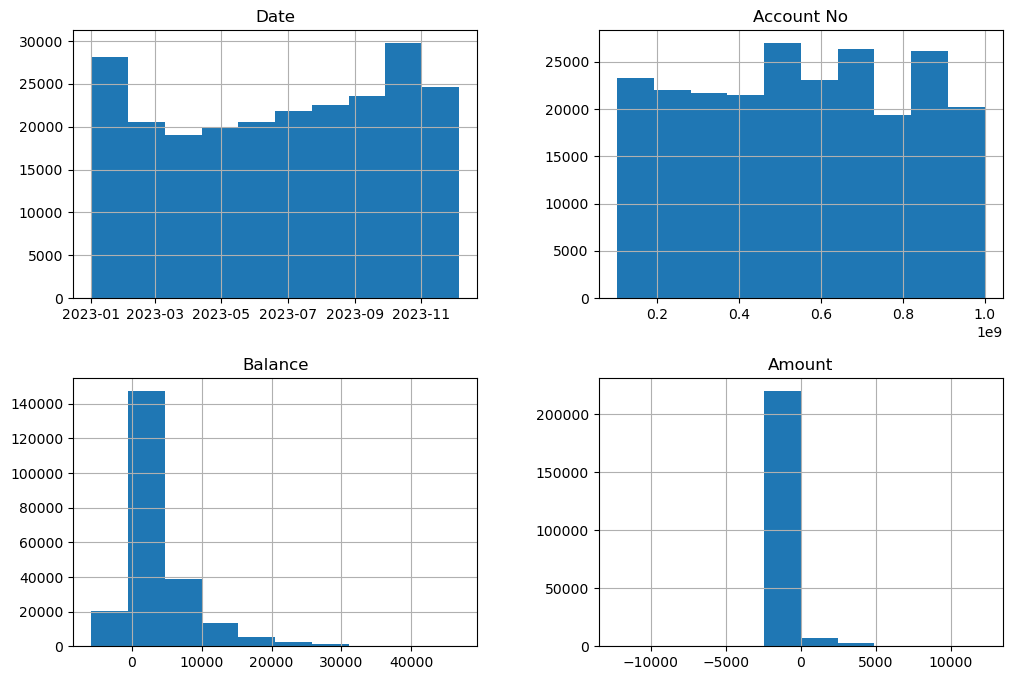

In [24]:
data.hist( figsize = (12,8) )
plt.show() ## to see the distributions of data

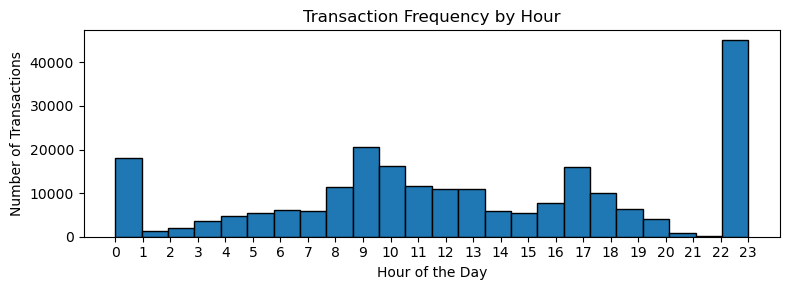

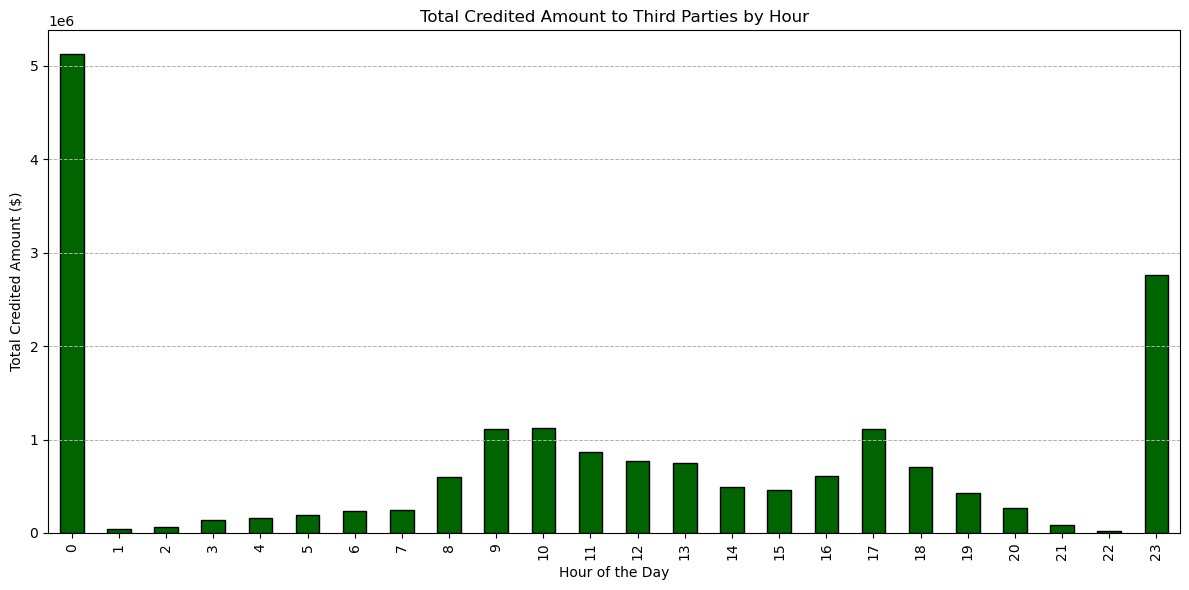

In [25]:
import matplotlib.pyplot as plt
import pandas as pd

# Plot the transaction frequency by hour
plt.figure(figsize=(8, 3))
plt.hist(pd.to_datetime(data['Timestamp']).dt.hour, bins=24, edgecolor='black')
plt.title('Transaction Frequency by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Transactions')
plt.xticks(range(24))  # Ensures ticks for every hour
plt.tight_layout()  # Adjust layout to fit the figure size
plt.show()

# Plot the total credited amount to third parties by hour
plt.figure(figsize=(12, 6))
data.loc[data['Amount'] < 0].groupby(pd.to_datetime(data['Timestamp']).dt.hour)['Amount'].apply(lambda x: abs(x).sum()).plot(
    kind='bar', color='darkgreen', edgecolor='black')
plt.title('Total Credited Amount to Third Parties by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Credited Amount ($)')
plt.xticks(range(24))  # Ensures ticks for every hour
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.tight_layout()  # Adjust layout to fit the figure size
plt.show()


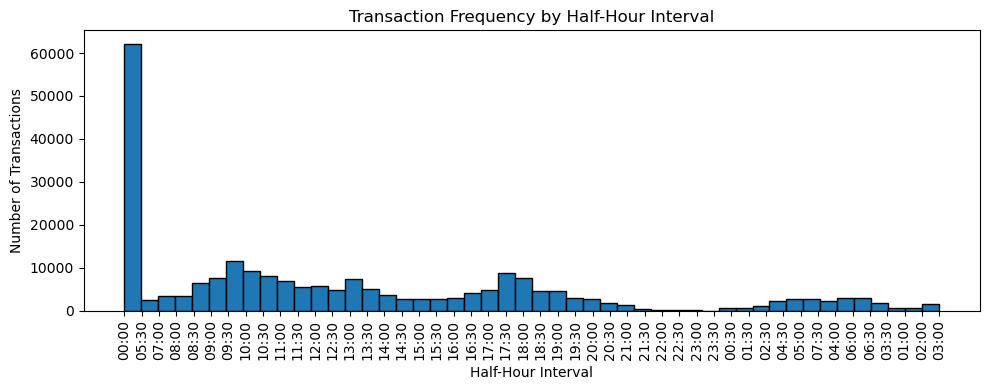

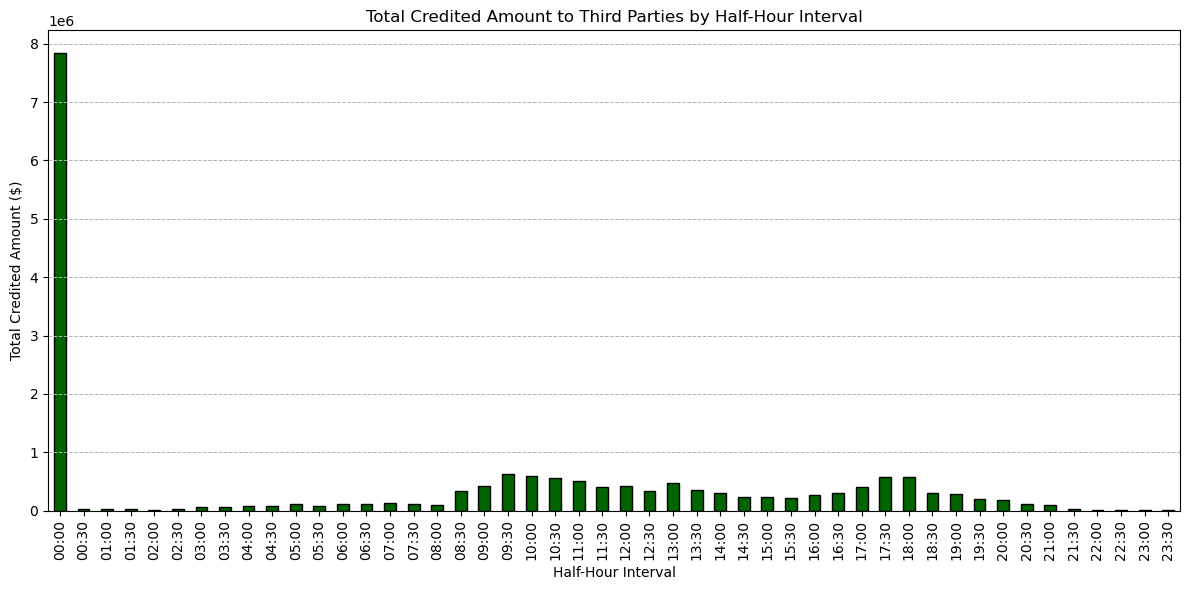

In [29]:
import matplotlib.pyplot as plt
import pandas as pd

# Plot the transaction frequency by half-hour intervals
plt.figure(figsize=(10, 4))
plt.hist(pd.to_datetime(data['Timestamp']).dt.round('30min').dt.strftime('%H:%M'), bins=48, edgecolor='black')
plt.title('Transaction Frequency by Half-Hour Interval')
plt.xlabel('Half-Hour Interval')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to fit the figure size
plt.show()

# Plot the total credited amount to third parties by half-hour intervals
plt.figure(figsize=(12, 6))
data.loc[data['Amount'] < 0].groupby(pd.to_datetime(data['Timestamp']).dt.round('30min').dt.strftime('%H:%M'))['Amount'].apply(lambda x: abs(x).sum()).plot(
    kind='bar', color='darkgreen', edgecolor='black')
plt.title('Total Credited Amount to Third Parties by Half-Hour Interval')
plt.xlabel('Half-Hour Interval')
plt.ylabel('Total Credited Amount ($)')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.tight_layout()  # Adjust layout to fit the figure size
plt.show()


## First plot:
- transaction frequency by hour (activity at certain times of the day). 
- It appears that there's a peak in transactions towards the end of the day, around 23:00. 
## second plot:
- plot shows the total credited amount to third parties by hour.
- presents the absolute values of the negative amounts to reflect the spending positively.

In [33]:
# Calculate the spending for each account by summing the absolute values of negative amounts
spending_per_account = data.loc[data['Amount'] < 0].groupby('Account No')['Amount'].apply(lambda x: abs(x).sum())

# Identify the top 5 accounts with the highest spending
top_5_spenders = spending_per_account.nlargest(5)

# Calculate the overall spending by hour
overall_spending_by_hour = data.loc[data['Amount'] < 0].groupby(pd.to_datetime(data['Timestamp'], format='%H:%M').dt.hour)['Amount'].apply(lambda x: abs(x).sum())

# Determine the hour with the maximum overall spending
max_spending_hour = overall_spending_by_hour.idxmax()
max_spending_amount = overall_spending_by_hour.max()

# For each top spender, calculate the hour in which they spend the most
top_spenders_hours = data.loc[(data['Amount'] < 0) & (data['Account No'].isin(top_5_spenders.index))]
top_spenders_most_active_hour = top_spenders_hours.groupby('Account No')['Amount'].apply(lambda x: abs(x).sum())

# Find the most active hour of spending for each of the top 5 spenders
top_5_hours = {}
for account in top_5_spenders.index:
    top_5_hours[account] = top_spenders_hours.loc[top_spenders_hours['Account No'] == account, pd.to_datetime(top_spenders_hours['Timestamp'], format='%H:%M').dt.hour].value_counts().idxmax()

max_spending_hour, max_spending_amount, top_5_hours


KeyError: "None of [Int64Index([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,\n            ...\n            13,  2,  4,  4,  9, 19,  4,  5,  6,  7],\n           dtype='int64', length=1382)] are in the [columns]"

In [32]:
data

,Date,Timestamp,Account No,Balance,Amount,Third Party,Hour
0,2023-01-01,00:00,678330503,2971.000000,1584.00,Westport Care Home,0
1,2023-01-01,00:00,472213568,3792.000000,1950.00,Barbiee Boutique,0
2,2023-01-01,00:00,472213568,3012.000000,-780.00,283027736,0
3,2023-01-01,00:00,283027736,1787.000000,780.00,472213568,0
4,2023-01-01,00:00,624500124,3226.000000,1825.00,Fat Face,0
...,...,...,...,...,...,...,...
230591,2023-12-06,20:54,581655972,45935.206861,-41.06,Tesco,20
230592,2023-12-06,20:55,786141370,-244.837500,-62.35,Sainsbury Local,20
230593,2023-12-06,21:05,824916823,9709.172159,-32.94,Deliveroo,21
230594,2023-12-06,21:13,366550080,26834.165794,-19.25,Amazon,21


In [ ]:
data.isnull().sum()

## how to impute amount and balance column 

## analyze the relationship between transaction direction (debit/credit) and balance:
1. Segment the Data
2. Statistical Summary
3. Visual Analysis

In [ ]:
# Identify debits and credits
debits = data[data['Amount'] < 0]
credits = data[data['Amount'] > 0]

In [ ]:
# Calculate statistics for debits and credits
debit_stats = debits['Balance'].describe()
credit_stats = credits['Balance'].describe()

print("Debit Statistics:\n", debit_stats)
print("\nCredit Statistics:\n", credit_stats)

In [ ]:
# Sort data by Date and Account No
data.sort_values(by=['Account No', 'Date'], inplace=True)

# Forward fill missing Balance and Amount
data['Balance'] = data.groupby('Account No')['Balance'].fillna(method='ffill')
data['Amount'] = data.groupby('Account No')['Amount'].fillna(method='ffill')

In [ ]:
# Optional: Plot to visualize imputation effects
import matplotlib.pyplot as plt

# Filter for a specific account to visualize
sample_account = data[data['Account No'] == 999752673]  # Replace some_account_number with an actual number

plt.figure(figsize=(14, 7))
plt.subplot(2, 1, 1)
plt.plot(sample_account['Date'], sample_account['Balance'], marker='o', linestyle='-')
plt.title('Balance Over Time')
plt.xlabel('Date')
plt.ylabel('Balance')

plt.subplot(2, 1, 2)
plt.plot(sample_account['Date'], sample_account['Amount'], marker='o', linestyle='-')
plt.title('Transaction Amount Over Time')
plt.xlabel('Date')
plt.ylabel('Amount')

plt.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Label the transactions as debit or credit
data['Transaction Type'] = ['Credit' if amt > 0 else 'Debit' for amt in data['Amount']]

# Plotting the distribution of Balances for debits and credits
plt.figure(figsize=(6,3))
sns.boxplot(x='Transaction Type', y='Balance', data=data)
plt.title('Balance Distribution for Debits and Credits')
plt.xlabel('Transaction Type')
plt.ylabel('Balance')
plt.show()

In [ ]:
# Interpolate missing values for Balance and Amount
#data['Balance'] = data['Balance'].interpolate(method='linear')
#data['Amount'] = data['Amount'].interpolate(method='linear')

In [ ]:
# nearest integer/ rounding
data['Balance'] = data['Balance'].round().astype(int)
data['Amount'] = data['Amount'].round().astype(int)

In [ ]:
# Calculate statistics for debits and credits
debit_stats = debits['Balance'].describe()
credit_stats = credits['Balance'].describe()

In [ ]:
debit_stats

In [ ]:
credit_stats

In [ ]:
import pandas as pd

# Assuming you have a DataFrame named 'data' containing your transaction data
# Make sure you have columns named 'Date' and 'Timestamp' representing date and time respectively

# Convert 'Date' and 'Timestamp' columns to string type if they're not already
data['Date'] = data['Date'].astype(str)
data['Timestamp'] = data['Timestamp'].astype(str)

# Concatenate date and time columns
data['Datetime'] = data['Date'] + ' ' + data['Timestamp']

# Convert the concatenated string to datetime data type
data['Datetime'] = pd.to_datetime(data['Datetime'])

# Drop the original date and time columns if needed
data = data.drop(columns=['Date', 'Timestamp'])


In [ ]:
# Reorder the columns with 'Datetime' as the first column
data = data[['Datetime'] + [col for col in data.columns if col != 'Datetime']]

In [ ]:
data

In [ ]:
import matplotlib.pyplot as plt

# Resample data on a monthly basis and calculate the sum of transaction amounts
monthly_transactions = data.resample('M', on='Datetime')['Amount'].sum()

# Plot the monthly transaction amounts
plt.figure(figsize=(10, 4))
monthly_transactions.plot(title='Monthly Transaction Amounts Over Time')
plt.xlabel('Month')
plt.ylabel('Total Transaction Amount')
plt.grid(True)
plt.show()

In [ ]:
# Resample data on a weekly basis and calculate the sum of transaction amounts
weekly_transactions = data.resample('W', on='Datetime')['Amount'].sum()

# Plot the weekly transaction amounts
plt.figure(figsize=(14, 7))
weekly_transactions.plot(title='Weekly Transaction Amounts Over Time')
plt.xlabel('Week')
plt.ylabel('Total Transaction Amount')
plt.grid(True)
plt.show()

In [ ]:
# Separate credits and debits
credits = data[data['Amount'] > 0]
debits = data[data['Amount'] < 0]

# Resample credits and debits on a monthly basis and calculate the sum of transaction amounts
monthly_credits = credits.resample('M', on='Datetime')['Amount'].sum()
monthly_debits = debits.resample('M', on='Datetime')['Amount'].sum()

# Plot the monthly transaction amounts for credits and debits
plt.figure(figsize=(10,4))
monthly_credits.plot(label='Credits', color='green')
monthly_debits.plot(label='Debits', color='red')
plt.title('Monthly Credits vs Debits Over Time')
plt.xlabel('Month')
plt.ylabel('Total Transaction Amount')
plt.legend()
plt.grid(True)
plt.show()

## Key Observations:

Volatility: The debits seem more volatile compared to credits, which could indicate varying spending habits or payment cycles.

Trends: There might be specific months where credits or debits peak, which could correspond to seasonal factors, tax periods, or other cyclical events affecting transaction volumes.

In [ ]:
# Calculate weekly changes in transaction amounts
weekly_changes = weekly_transactions.diff()

# Identify top 5 weeks with the largest positive and negative changes
top_increases = weekly_changes.nlargest(5)
top_decreases = weekly_changes.nsmallest(5)

# Filter data to include only the weeks identified
significant_weeks = pd.concat([top_increases, top_decreases]).sort_index()
significant_weeks_dates = significant_weeks.index

# Filter the original data for the significant weeks to look at transaction details
significant_transactions = data[(data['Datetime'] >= significant_weeks_dates.min()) & 
                                (data['Datetime'] <= significant_weeks_dates.max())]

#significant_transactions.head(), top_increases, top_decreases

In [ ]:
import seaborn as sns

# Create a subset for visualization based on significant weeks
visual_subset = data[data['Datetime'].dt.week.isin(significant_weeks_dates.week)]

# Plot transaction amounts for significant weeks
plt.figure(figsize=(14, 7))
sns.boxplot(x=visual_subset['Datetime'].dt.strftime('%Y-%m'), y='Amount', data=visual_subset)
plt.xticks(rotation=45)
plt.title('Transaction Amounts for months with Significant Changes')
plt.xlabel('month')
plt.ylabel('Transaction Amount')
plt.grid(True)
plt.show()

In [ ]:
data

In [ ]:
# Count the number of negative amounts (Debits)
negative_amount_count = (data['Amount'] < 0).sum()
print(f"Count of negative amounts (Debits): {negative_amount_count}")

In [ ]:
# Count the number of negative amounts (credtis)
negative_amount_count = (data['Amount'] > 0).sum()
print(f"Count of negative amounts (Debits): {negative_amount_count}")

In [ ]:
# Count the number of negative amounts (accounts balnce in negative)
negative_amount_count = (data['Balance'] < 0).sum()
print(f"Count of negative amounts (Debits): {negative_amount_count}")

# Segmentation by Transaction Amount

In [ ]:
# Define bins and labels for transaction amount segmentation
amount_bins = [-float('inf'), 25, 50, float('inf')]
amount_labels = ['Low', 'Medium', 'High']

# Segment transactions based on Amount
data['Amount_Segment'] = pd.cut(data['Amount'], bins=amount_bins, labels=amount_labels)
print(data['Amount_Segment'].value_counts())


# Transaction Frequency Segmentation

In [ ]:
# Count the number of transactions per account
transaction_freq = data['Account No'].value_counts()

# Define thresholds based on quantiles for segmentation
freq_thresholds = [0, transaction_freq.quantile(0.33), transaction_freq.quantile(0.66), float('inf')]
freq_labels = ['Low', 'Medium', 'High']

# Segment customers based on transaction frequency
data['Freq_Segment'] = pd.cut(data['Account No'].map(transaction_freq), bins=freq_thresholds, labels=freq_labels)
print(data['Freq_Segment'].value_counts())

# by date 

In [ ]:
# Calculate the interquartile range to determine outliers in transaction amounts
Q1 = data['Amount'].quantile(0.25)
Q3 = data['Amount'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

# Filter transactions that are outliers
outlier_transactions = data[(data['Amount'] > upper_bound) | (data['Amount'] < lower_bound)]

# Display outlier transactions
outlier_transactions.head(), outlier_transactions.describe()


## observations:
Count: 28,533 transactions are identified as outliers.

Mean Balance: 2,959.32, which indicates the average account balance after these transactions.

Amount Range: From -12,240 to 12,240, showing both large credits and debits.

Standard Deviation in Amount: 1,393.51, indicating a high variance in transaction amounts among outliers.

In [ ]:
# Extract the hour from the Datetime for analysis
outlier_transactions['Hour'] = outlier_transactions['Datetime'].dt.hour

# Plot the distribution of outlier transactions across different hours of the day
plt.figure(figsize=(10, 4))
sns.countplot(x='Hour', data=outlier_transactions)
plt.title('Distribution of Outlier Transactions by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Count of Transactions')
plt.grid(True)
plt.show()

## Insights
Nighttime Transactions: Elevated levels of transaction activity during late hours could indicate fraudulent behavior, as these times are typically off-peak for regular consumer transactions.

Regular Business Hours Activity: While there is also activity during regular hours, the spikes during unusual hours warrant closer scrutiny.

In [ ]:
# Count the number of outlier transactions for each account
account_outlier_counts = outlier_transactions['Account No'].value_counts()

# Merge this with the main data to see if these accounts also show unusual transaction times
outlier_accounts = pd.DataFrame(account_outlier_counts).reset_index()
outlier_accounts.columns = ['Account No', 'Outlier Count']

# Examine accounts with the highest number of outlier transactions
high_outlier_accounts = outlier_accounts[outlier_accounts['Outlier Count'] > outlier_accounts['Outlier Count'].quantile(0.95)]

# Display the details of accounts with high outlier transactions
high_outlier_accounts.head(), high_outlier_accounts.describe()


In [ ]:
data['Third Party'].nunique()

In [ ]:
top_parties = data['Third Party'].value_counts().head(10)

plt.figure(figsize=(7,3))
sns.barplot(x=top_parties.values, y=top_parties.index, palette='viridis')
plt.title('Top 10 Third Parties by Transaction Frequency', fontsize=16)
plt.xlabel('Number of Transactions', fontsize=14)
plt.ylabel('Third Party', fontsize=14)
plt.grid(True, axis='x')
plt.show()

# Temporal analysis:

In [ ]:
## EDA
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your DataFrame
data['Datetime'] = pd.to_datetime(data['Datetime'])

# Descriptive statistics
print(data.describe())
print(data['Transaction Type'].value_counts())

# Missing values check
print(data.isnull().sum())

# New features
data['Day of Week'] = data['Datetime'].dt.day_name()
data['Hour of Day'] = data['Datetime'].dt.hour

# Transaction trends
plt.figure(figsize=(14, 7))
sns.lineplot(x='Datetime', y='Amount', data=data)
plt.title('Transaction Amount Over Time')
plt.xlabel('Datetime')
plt.ylabel('Amount')
plt.show()

# Distribution of transactions
plt.figure(figsize=(10, 6))
sns.histplot(data['Amount'], bins=30, kde=True)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Transaction Amount')
plt.show()

# Balance over time for a specific account
sample_account = data[data['Account No'] == data['Account No'].unique()[0]]
plt.figure(figsize=(14, 7))
plt.plot(sample_account['Datetime'], sample_account['Balance'], marker='o')
plt.title('Balance Over Time for Account No: {}'.format(sample_account['Account No'].iloc[0]))
plt.xlabel('Datetime')
plt.ylabel('Balance')
plt.grid(True)
plt.show()

# Correlation matrix
corr = data[['Balance', 'Amount']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Assuming data is already loaded into a DataFrame named `data`
# Convert 'Datetime' from string to datetime format if not already done
data['Datetime'] = pd.to_datetime(data['Datetime'])

# Create time-based features
data['Hour'] = data['Datetime'].dt.hour
data['Day of Week'] = data['Datetime'].dt.day_name()
data['Month'] = data['Datetime'].dt.month

# Plot transactions over time to identify peaks
plt.figure(figsize=(12, 6))
sns.lineplot(x='Hour', y='Amount', data=data, estimator=sum, ci=None)
plt.title('Total Transaction Amount by Hour of Day')
plt.show()

# Analyzing transactions by day of week
plt.figure(figsize=(12, 6))
sns.barplot(x='Day of Week', y='Amount', data=data, estimator=sum)
plt.title('Total Transaction Amount by Day of Week')
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load and prepare the data
data['Month-Year'] = data['Datetime'].dt.to_period('M')
monthly_data = data.groupby('Month-Year')['Amount'].sum()

# Plotting a line graph of monthly transaction volumes over multiple years
plt.figure(figsize=(14, 7))
monthly_data.plot(title='Monthly Transaction Volumes Over Years')
plt.xlabel('Month-Year')
plt.ylabel('Total Transaction Volume')
plt.grid(True)
plt.show()

# Creating a heatmap of monthly data for multiple years
data['Year'] = data['Datetime'].dt.year
data['Month'] = data['Datetime'].dt.month
pivot_table = data.pivot_table(values='Amount', index='Month', columns='Year', aggfunc='sum')

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, fmt=".0f", linewidths=.5, cmap='Blues')
plt.title('Heatmap of Transaction Volumes by Month and Year')
plt.xlabel('Year')
plt.ylabel('Month')
plt.show()


In [ ]:
## marketing

In [ ]:
data['Third Party Name'] = data['Third Party'].apply(lambda x: x if isinstance(x, str) else None)
data['Third Party Account No'] = data['Third Party'].apply(lambda x: x if isinstance(x, int) else None)

In [ ]:
data['Third Party Name'] = data['Third Party Name'].str.upper().str.strip()

In [ ]:
frequent_parties = data['Third Party Name'].value_counts().head(10)

In [ ]:
frequent_parties

In [ ]:
pivot_data = data.pivot_table(values='Amount', index='Third Party Name', aggfunc=['sum', 'count'])

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Top third parties by transaction count
plt.figure(figsize=(10, 6))
sns.barplot(x=frequent_parties.values, y=frequent_parties.index)
plt.title('Most Frequent Third Parties')
plt.xlabel('Number of Transactions')
plt.ylabel('Third Party')
plt.show()

### Targeted Offers
Co-branded Campaigns: Partner with popular third parties identified in the data, like Tesco or Amazon, to create co-branded offers. For instance, a "Shop with Tesco and save on your next bank service fee" campaign can drive transactions and build loyalty.

Reward Programs: Develop rewards programs that incentivize customers to shop with these third parties. For example, double the reward points when using your bank's credit card at any of the top third-party merchants.

Exclusive Deals: Negotiate exclusive deals or discounts with these third parties for your customers. If Fat Face is a popular merchant, an exclusive 10% discount for your bank's customers can be a strong incentive.

Bundle Offers: Bundle banking services with third-party offerings. For instance, new account sign-ups could come with discount vouchers for Sports Direct or free delivery from Deliveroo.

In [ ]:
import pandas as pd

# Assuming 'data' is your DataFrame already loaded from previous analysis or an external file

# Define the top third parties from your provided list
frequent_parties = ['Tesco', 'Sports Direct', 'Topshop', 'Amazon', 'Fat Face', 
                    'PureGym', 'Matalan', 'Netflix', 'JustEat', 'Deliveroo']

# Filter your data to include only transactions with these top third parties
top_data = data[data['Third Party'].isin(frequent_parties)]

# Customer Profiling
# Define a function to create profiles based on transactions with specific third parties
def identify_profile(third_party):
    if third_party in ['Amazon']:
        return 'Tech-Savvy Shopper'
    elif third_party in ['PureGym']:
        return 'Fitness Enthusiast'
    elif third_party in ['Sports Direct']:
        return 'Sports Equipment Lover'
    elif third_party in ['Tesco', 'Topshop', 'Fat Face', 'Matalan']:
        return 'Regular Retail Shopper'
    elif third_party in ['Netflix', 'JustEat', 'Deliveroo']:
        return 'Home Entertainment Lover'
    else:
        return 'General Shopper'

top_data['Customer Profile'] = top_data['Third Party'].apply(identify_profile)

# Personalized Communication
# Map personalized messages to different customer segments
personalized_messages = {
    'Tech-Savvy Shopper': "Explore the latest tech gadgets on Amazon with our exclusive card rewards!",
    'Fitness Enthusiast': "Stay fit and healthy! Enjoy special offers from PureGym just for you.",
    'Sports Equipment Lover': "Get ready to elevate your game with the best deals from Sports Direct!",
    'Regular Retail Shopper': "Discover the best shopping deals and enjoy exclusive rewards at Tesco and more!",
    'Home Entertainment Lover': "Enhance your home entertainment with exclusive offers from Netflix, JustEat, and Deliveroo!"
}

top_data['Personalized Message'] = top_data['Customer Profile'].map(personalized_messages)

# Product Customization
# Suggest products based on customer profiles
product_suggestions = {
    'Tech-Savvy Shopper': 'High-Tech Rewards Card',
    'Fitness Enthusiast': 'Fitness Fanatic Credit Card',
    'Sports Equipment Lover': 'Sports Rewards Card',
    'Regular Retail Shopper': 'Premium Retail Rewards Card',
    'Home Entertainment Lover': 'Entertainment Rewards Card'
}

top_data['Suggested Product'] = top_data['Customer Profile'].map(product_suggestions)

# Display the enhanced dataset with profiles, messages, and product suggestions
print(top_data[['Account No', 'Third Party', 'Customer Profile', 'Personalized Message', 'Suggested Product']])


In [ ]:
import pandas as pd

# Assuming 'data' is your DataFrame already loaded from previous analysis

# Filter data for only the top third parties you are interested in
frequent_parties = ['Tesco', 'Sports Direct', 'Topshop', 'Amazon', 'Fat Face', 
                    'PureGym', 'Matalan', 'Netflix', 'JustEat', 'Deliveroo']
top_data = data[data['Third Party'].isin(frequent_parties)]

# Calculate frequency of transactions for each third party
transaction_frequencies = top_data['Third Party'].value_counts()

# Calculate total amount spent at each third party
total_spent = top_data.groupby('Third Party')['Amount'].sum()

# Calculate the number of unique users (accounts) for each third party
unique_users = top_data.groupby('Third Party')['Account No'].nunique()

# Combine all these metrics into a single DataFrame for a comprehensive overview
third_party_analysis = pd.DataFrame({
    'Frequency of Transactions': transaction_frequencies,
    'Total Amount Spent': total_spent,
    'Unique Users': unique_users
})

# Print the combined analysis
print(third_party_analysis)


### Analaysis
Transaction Frequencies: This metric shows how many transactions each third party has, which helps identify the most frequented businesses by your customers.

Total Amount Spent: Knowing the total amount spent can indicate the financial significance of each third party in your customers' spending habits.

Unique Users: The number of unique users transacting with each third party highlights how widely used a third party is among your customer base, which can be crucial for targeted marketing strategies.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'top_data' is already loaded and filtered for top third parties

# Calculate necessary metrics
transaction_frequencies = top_data['Third Party'].value_counts()
total_spent = top_data.groupby('Third Party')['Amount'].sum()
unique_users = top_data.groupby('Third Party')['Account No'].nunique()

# Creating a DataFrame for easy visualization
third_party_metrics = pd.DataFrame({
    'Transaction Frequencies': transaction_frequencies,
    'Total Amount Spent': total_spent,
    'Unique Users': unique_users
}).sort_values(by='Transaction Frequencies', ascending=False)  # Sorting for better visual representation

# Plotting
plt.figure(figsize=(14, 7))

# Subplot 1: Transaction Frequencies
plt.subplot(1, 3, 1)
sns.barplot(x=third_party_metrics['Transaction Frequencies'], y=third_party_metrics.index, palette='viridis')
plt.title('Transaction Frequencies')
plt.xlabel('Number of Transactions')
plt.ylabel('Third Party')

# Subplot 2: Total Amount Spent
plt.subplot(1, 3, 2)
sns.barplot(x=third_party_metrics['Total Amount Spent'], y=third_party_metrics.index, palette='viridis')
plt.title('Total Amount Spent')
plt.xlabel('Total Spent ($)')
plt.ylabel('')

# Subplot 3: Unique Users
plt.subplot(1, 3, 3)
sns.barplot(x=third_party_metrics['Unique Users'], y=third_party_metrics.index, palette='viridis')
plt.title('Unique Users')
plt.xlabel('Number of Unique Users')
plt.ylabel('')

plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'top_data' is already loaded and filtered for top third parties

# Calculate the metrics for each third party
transaction_frequencies = top_data['Third Party'].value_counts()
total_spent = top_data.groupby('Third Party')['Amount'].sum()
unique_users = top_data.groupby('Third Party')['Account No'].nunique()

# Creating a DataFrame for the analysis
analysis_df = pd.DataFrame({
    'Transaction Frequencies': transaction_frequencies,
    'Total Amount Spent': total_spent,
    'Unique Users': unique_users
})

# Ensure the DataFrame only contains the top ten third parties based on transaction frequencies
top_ten_third_parties = analysis_df.nlargest(10, 'Transaction Frequencies')

# Generating a pairplot of the top ten third parties
sns.pairplot(top_ten_third_parties, kind='scatter', diag_kind='kde', plot_kws={'alpha': 0.6, 's': 80, 'edgecolor': 'k'})
plt.suptitle('Pairplot of Transaction Metrics for Top Ten Third Parties')
plt.show()

In [ ]:
from sklearn.cluster import KMeans
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame and has the necessary columns
# Select the features you want to use for clustering
X = data[['Balance', 'Amount']].dropna()  # Dropping NA values to avoid errors during fitting

# Scale the data if necessary - Here we are assuming it's already appropriately scaled for simplicity

# Initialize KMeans with three clusters
kmeans = KMeans(n_clusters=3, random_state=0)
# Fit the model and predict cluster indices for X
X['Cluster'] = kmeans.fit_predict(X)

# Append cluster information back to the original data
data = data.join(X['Cluster'], how='left', rsuffix='_cluster')

# Analyze the characteristics of each cluster
cluster_summary = data.groupby('Cluster').agg({
    'Balance': ['mean', 'std'],
    'Amount': ['mean', 'std', 'count']
})
print(cluster_summary)

# Visualize the clusters
sns.scatterplot(x='Balance', y='Amount', hue='Cluster', data=X, palette='viridis')
plt.title('Customer Segmentation by Balance and Transaction Amount')
plt.xlabel('Balance')
plt.ylabel('Amount')
plt.legend(title='Cluster')
plt.show()


## Transactions that are several standard deviations away from the mean might be considered suspicious:
- Transactions that are several standard deviations away from the mean might be considered suspicious:

In [ ]:
# Calculate the mean and standard deviation
mean_amount = data['Amount'].mean()
std_amount = data['Amount'].std()

# Identify outliers as transactions that are more than 3 standard deviations from the mean
outliers = data[np.abs(data['Amount'] - mean_amount) > 3 * std_amount]

# Display outliers
outliers[['Date', 'Amount', 'Account No', 'Third Party', 'Transaction Direction']]

## transactions occurring repeatedly at the same time to the same third party, which could indicate automated or scripted fraud:
- more than 5 times

In [ ]:
# Group by account number, third party, and hour to see repetitive patterns
repetitive_patterns = data.groupby(['Account No', 'Third Party', 'Timestamp']).size().reset_index(name='Count')

# Filter for patterns that occur more than a threshold, e.g., more than 5 times
suspicious_patterns = repetitive_patterns[repetitive_patterns['Count'] > 5]

# Display suspicious repetitive patterns
suspicious_patterns


## Visualisations

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot transaction amounts for outliers
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Date', y='Amount', hue='Transaction Direction', data=outliers)
plt.title('Outlier Transactions Over Time')
plt.xlabel('Date')
plt.ylabel('Transaction Amount')
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot transaction amounts for potential outliers
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Date', y='Amount', hue='Transaction Direction', style='Day of Week', data=data)
plt.title('Transaction Amounts Over Time')
plt.xlabel('Date')
plt.ylabel('Transaction Amount')
plt.show()


In [ ]:
# Create pairplot for selected columns to visualize relationships and distributions
sns.pairplot(data[['Amount', 'Balance', 'Transaction Direction']], hue='Transaction Direction', plot_kws={'alpha': 0.5})
plt.suptitle('Pairplot of Transactions', size=16, y=1.02)
plt.show()

In [ ]:
##

In [ ]:
# Create individual scatter plots instead of a pairplot to avoid issues with KDE and non-numeric data types
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Scatter plot of Amount vs. Balance
sns.scatterplot(x='Amount', y='Balance', hue='Transaction Direction', data=data, ax=axs[0], alpha=0.5)
axs[0].set_title('Scatter Plot of Amount vs. Balance')
axs[0].set_xlabel('Amount')
axs[0].set_ylabel('Balance')

# Scatter plot of Amount vs. Hour of Transaction
sns.scatterplot(x='Amount', y='Timestamp', hue='Transaction Direction', data=data, ax=axs[1], alpha=0.5)
axs[1].set_title('Scatter Plot of Amount vs. Hour of Transaction')
axs[1].set_xlabel('Amount')
axs[1].set_ylabel('Hour of Transaction')

plt.tight_layout()
plt.show()

## Monthly Banking Activity: Insights from Total Spent, Total Credited, and Transaction Count

In [ ]:

# Using 'Grouper' to group by month directly

monthly_data = data.groupby(['Account No', pd.Grouper(key='Date', freq='M')]).agg(
    Total_Spent=pd.NamedAgg(column='Amount', aggfunc=lambda x: x[x < 0].sum()),
    Total_Credited=pd.NamedAgg(column='Amount', aggfunc=lambda x: x[x >= 0].sum()),
    Transaction_Count=pd.NamedAgg(column='Amount', aggfunc='count')
).reset_index()

# Converting 'Date' to 'Year-Month' format for easier reading
monthly_data['Date'] = monthly_data['Date'].dt.to_period('M')

# Display the first few rows of the modified monthly statistics
monthly_data.head(5)


In [ ]:
monthly_data.shape

In [ ]:
data['Account No'].unique().shape

## checking all the users spending evry month or not

In [ ]:
# To ensure each account's activity is accounted for in every expected month of the dataset, 
# we'll check which months each account has transactions and list any missing months.

# First, get the full range of months from the dataset
full_date_range = pd.period_range(data['Date'].min(), data['Date'].max(), freq='M')

# Dictionary to store missing months for each account
missing_months_dict = {}

# Iterating over each account
for account, group in data.groupby('Account No'):
    present_months = group['Date'].dt.to_period('M').unique()
    missing_months = full_date_range[~full_date_range.isin(present_months)]
    if len(missing_months) > 0:
        missing_months_dict[account] = missing_months

# Create a list to store tuples of account number and missing month
missing_months_list = []

# Iterate over the dictionary and append tuples to the list
for account, missing_months in missing_months_dict.items():
    for month in missing_months:
        missing_months_list.append((account, month))

# Create a DataFrame from the list
missing_months_df = pd.DataFrame(missing_months_list, columns=['Account No', 'Missing Month'])

# Display the DataFrame
print(missing_months_df)


In [ ]:
## no.of transactions on each day..smtwthfss..
# find any trends
## his status at the end of month- whether he is in debt or credit

In [ ]:
data

## fraud detection using transactional data

In [ ]:
# Convert 'Date' and 'Timestamp' into a single datetime column for easier manipulation
#data['Timestamp'] = pd.to_datetime(data['Date'] + ' ' + data['Timestamp'], errors='coerce')

# Calculate mean and standard deviation for each account without storing them as columns
mean_amounts = data.groupby('Account No')['Amount'].transform('mean')
std_amounts = data.groupby('Account No')['Amount'].transform('std')

# Identify high-value transactions
high_value = data['Amount'] > (mean_amounts + 3 * std_amounts)

# Detect frequent transactions in short times by counting the transactions per minute for each account
frequent_transactions = data.groupby(['Account No', data['Timestamp'].dt.floor('min')])['Amount'].transform('size') > 3

# Check for transactions that are round figures
round_figure_transaction = data['Amount'].mod(1000) == 0

# Combine the criteria to filter potential fraudulent transactions
suspicious_transactions = data[high_value | frequent_transactions | round_figure_transaction]

# Display the suspicious transactions
print(suspicious_transactions[['Date', 'Timestamp', 'Account No', 'Amount', 'Third Party', 'Transaction Direction']])


In [ ]:
suspicious_transactions

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming suspicious_transactions is already defined
# and data['Timestamp'] has been created and is the datetime combination of 'Date' and 'Timestamp'

# 1. Scatter Plot of Transaction Amounts Over Time
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Timestamp', y='Amount', data=suspicious_transactions, hue='Transaction Direction', style='Transaction Direction')
plt.title('Suspicious Transactions Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Transaction Amount')
plt.xticks(rotation=45)
plt.legend(title='Transaction Type')
plt.tight_layout()
plt.show()

# 2. Histogram of Transaction Amounts
plt.figure(figsize=(10, 6))
sns.histplot(suspicious_transactions['Amount'], bins=30, kde=False, color='red')
plt.title('Distribution of Suspicious Transaction Amounts')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming suspicious_transactions is already defined
# and data['Timestamp'] has been created and is the datetime combination of 'Date' and 'Timestamp'

# Extract more features from 'Timestamp' if needed
suspicious_transactions['Hour of Day'] = suspicious_transactions['Timestamp'].dt.hour
suspicious_transactions['Day of Week'] = suspicious_transactions['Timestamp'].dt.dayofweek

# Select columns to include in the pairplot
# Including 'Amount', 'Hour of Day', and 'Day of Week'
# If 'Transaction Direction' is categorical, it can be used as a hue
plot_data = suspicious_transactions[['Amount', 'Hour of Day', 'Day of Week', 'Transaction Direction']]

# Create the pairplot
sns.pairplot(plot_data, hue='Transaction Direction', diag_kind='kde', plot_kws={'alpha': 0.6, 's': 60, 'edgecolor': 'k'}, height=3)
plt.suptitle('Pairplot of Suspicious Transactions')
plt.show()
